<a href="https://colab.research.google.com/github/TraflagarLaw/Brain-Tumour-Detection/blob/main/Brain_Tumour_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls gdrive/MyDrive/ | grep archive.zip

archive.zip


In [ ]:
#!mkdir -pv content/sample_data/
#!cp gdrive/MyDrive/archive.zip content/sample_data/
#!unzip content/sample_data/archive.zip

Archive:  content/sample_data/archive.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg  
  inflati

In [ ]:
import torch
from torchvision import datasets, transforms
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
#import numpy as np
import torch.nn as nn
import torchvision
import torch.optim as optim
import pathlib
import glob

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device is {device}")

Device is cuda


In [ ]:

train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5],  [0.5, 0.5, 0.5])])
test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])

train_data = datasets.ImageFolder('/content/Training', transform=train_transforms)
test_data = datasets.ImageFolder('/content/Testing', transform=test_transforms)

In [ ]:
trainloader = torch.utils.data.DataLoader(train_data, batch_size = 64, shuffle = True)
testloader = torch.utils.data.DataLoader(test_data, batch_size = 64, shuffle = True)

In [ ]:
class BraTSModel(nn.Module):
    def __init__(self, num_classes = 4):
        super(BraTSModel, self).__init__()
        #Conv layer 1
        # c = 3, H = 224, W = 224
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU(inplace=True)

        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) # 9, 112, 112

        # Conv layer 2
        # 9, 112, 112
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU(inplace=True)

        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2) # 18, 56, 56

        #conv 3
        #self.conv3 = nn.Conv2d(18, 24, kernel_size=3, stride=1, padding=1)
        #self.bn3 = nn.BatchNorm2d(24)
        #self.relu3 = nn.ReLU(inplace=True)

        #self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2) # 24, 28, 28

        # conv 4
        #self.conv4 = nn.Conv2d(24, 32, kernel_size=3, stride=1, padding=1)
        #self.relu4 = nn.ReLU(inplace=True)

        #self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2) # 32, 14, 14


        #conv 5
        #self.conv5 = nn.Conv2d(32, 38, kernel_size=3, stride=1, padding=1)
        #self.bn5 = nn.BatchNorm2d(38)
        #self.relu5 = nn.ReLU(inplace=True)

        #self.pool5 = nn.MaxPool2d(kernel_size=2, stride=2) # 38, 7, 7

        # conv 6
        #self.conv6 = nn.Conv2d(38, 40, kernel_size=3, stride=1, padding=1)
        #self.relu6 = nn.ReLU(inplace=True)

        #self.pool6 = nn.MaxPool2d(kernel_size=2, stride=2) # 40, 4.5, 4.5


        self.fc1 = nn.Linear(64 * 56 * 56, 512)
        self.relu6 = nn.ReLU(inplace=True)
        self.fc2 = nn.Linear(512, 4)

    def forward(self, x):
        #Conv 1
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        #Max Pool
        x = self.pool1(x)
        #conv 2
        x = self.conv2(x)
        x = self.relu2(x)
        #Max Pool
        x = self.pool2(x)
        #Conv 3
        #x = self.conv3(x)
        #x = self.bn3(x)
        #x = self.relu3(x)
        #Max Pool
        #x = self.pool3(x)
        #Conv 4
        #x = self.conv4(x)
        #x = self.relu4(x)
        #Max Pool
        #x = self.pool4(x)
        #Conv 5
        #x = self.conv5(x)
        #x = self.bn5(x)
        #x = self.relu5(x)
        #Max Pool
        #x = self.pool5(x)
        #Conv 6
        #x = self.conv6(x)
        #x = self.relu6(x)
        #Max Pool
        #x = self.pool6(x)

        x = x.view(-1, 64*56*56)
        x = self.fc1(x)
        x = self.relu6(x)
        x = self.fc2(x)
        return x

In [ ]:
# Test Brats model
class BraTSModel(nn.Module):
    def __init__(self, num_classes=4):
        super(BraTSModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU(inplace=True)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU(inplace=True)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU(inplace=True)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.relu4 = nn.ReLU(inplace=True)
        self.fc2 = nn.Linear(512, 4)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.fc2(x)
        return x

In [ ]:
#calculating the size of training and testing images
train_count =len(glob.glob('/content/Training/**/*.jpg'))
test_count =len(glob.glob('/content/Testing/**/*.jpg'))
print(train_count, test_count)

2870 394


In [ ]:
model = BraTSModel(num_classes = 4).to(device)

# loss function
loss_fn = nn.CrossEntropyLoss()
# optimizer
optimizer = optim.SGD(model.parameters(), lr=0.005, weight_decay = 0.00001) #Weight_decay To keep the weights small and avoid exploding gradient.


n_epochs = 20
train_losses = []
train_accu = []
eval_losses = []
eval_accu = []

for epoch in range(n_epochs):


    #Evaluation and Training on Training Dataset
    model.train()
    train_accuracy = 0.0
    train_loss = 0.0


    for i, (images, labels) in enumerate(trainloader):
        # Add Data and Labels to device
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad() # optimise with zero gradient before training

        outputs = model(images)
        loss = loss_fn(outputs, labels)
        #print(loss)
        loss.backward()
        optimizer.step()

        #train loss
        train_loss += loss.cpu().data * images.size(0)
        _,prediction = torch.max(outputs.data, 1)
        # train accuracy
        train_accuracy += int(torch.sum(prediction == labels.data))


    train_accuracy = train_accuracy/train_count
    train_loss = train_loss/train_count

    #losses and accuracy
    train_accu.append(train_accuracy)
    train_losses.append(train_loss)


    #Evaluation on Testing dataset
    model.eval()

    test_accuracy = 0.0
    test_loss = 0.0

    for i, (images, labels) in enumerate(testloader):
        # Add Data and Labels to device
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        t_loss = loss_fn(outputs,labels)
        t_loss.backward()

        #test loss
        test_loss += t_loss.cpu().data * images.size(0)
        _,prediction = torch.max(outputs.data, 1)
        test_accuracy += int(torch.sum(prediction == labels.data))



    test_accuracy = test_accuracy/test_count
    test_loss = test_loss/test_count
     # eval_losses and accu
    eval_losses.append(test_loss)
    eval_accu.append(test_accuracy)


    # Print Train loss, Train accuracy and Test accuracy at each epoch

    print('Epoch: '+str(epoch)+' Train Loss: '+str(float(train_loss))+' Train Accuracy: '+str(train_accuracy * 100)+' Test Loss: '+str(float(test_loss))+' Test Accuracy: '+str(test_accuracy * 100))

#save model
torch.save(model.state_dict(), 'BraTSModelClassifier.pth')

Epoch: 0 Train Loss: 1.345630168914795 Train Accuracy: 31.393728222996515 Test Loss: 1.4506516456604004 Test Accuracy: 29.187817258883246
Epoch: 1 Train Loss: 1.3260036706924438 Train Accuracy: 34.25087108013937 Test Loss: 1.4344841241836548 Test Accuracy: 24.111675126903553
Epoch: 2 Train Loss: 1.3145344257354736 Train Accuracy: 35.74912891986063 Test Loss: 1.4180785417556763 Test Accuracy: 33.24873096446701
Epoch: 3 Train Loss: 1.2983877658843994 Train Accuracy: 38.57142857142858 Test Loss: 1.3998571634292603 Test Accuracy: 35.53299492385787
Epoch: 4 Train Loss: 1.2742042541503906 Train Accuracy: 41.951219512195124 Test Loss: 1.4085516929626465 Test Accuracy: 35.53299492385787
Epoch: 5 Train Loss: 1.2420305013656616 Train Accuracy: 43.55400696864111 Test Loss: 1.3698866367340088 Test Accuracy: 29.695431472081218
Epoch: 6 Train Loss: 1.2269529104232788 Train Accuracy: 43.937282229965156 Test Loss: 1.409651279449463 Test Accuracy: 32.99492385786802
Epoch: 7 Train Loss: 1.20030534267425

In [ ]:
print(train_accu)
print(eval_accu)

[0.31393728222996514, 0.3425087108013937, 0.3574912891986063, 0.38571428571428573, 0.4195121951219512, 0.4355400696864111, 0.4393728222996516, 0.45574912891986064, 0.47421602787456446, 0.46550522648083625, 0.5059233449477352, 0.49790940766550523, 0.5167247386759581, 0.5135888501742161, 0.5149825783972125, 0.5212543554006969, 0.5229965156794425, 0.5289198606271777, 0.5222996515679442, 0.5320557491289198]
[0.2918781725888325, 0.24111675126903553, 0.33248730964467005, 0.3553299492385787, 0.3553299492385787, 0.2969543147208122, 0.3299492385786802, 0.31725888324873097, 0.2969543147208122, 0.27411167512690354, 0.29949238578680204, 0.2918781725888325, 0.2969543147208122, 0.30710659898477155, 0.2766497461928934, 0.28426395939086296, 0.29441624365482233, 0.26903553299492383, 0.27918781725888325, 0.29949238578680204]


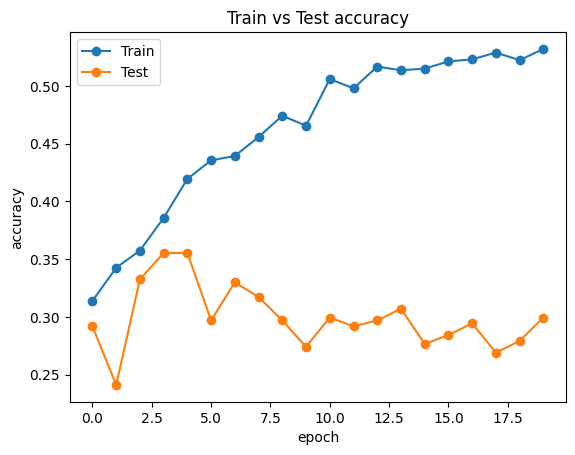

In [ ]:
plt.plot(train_accu,'-o')
plt.plot(eval_accu,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.title('Train vs Test accuracy')

plt.show()

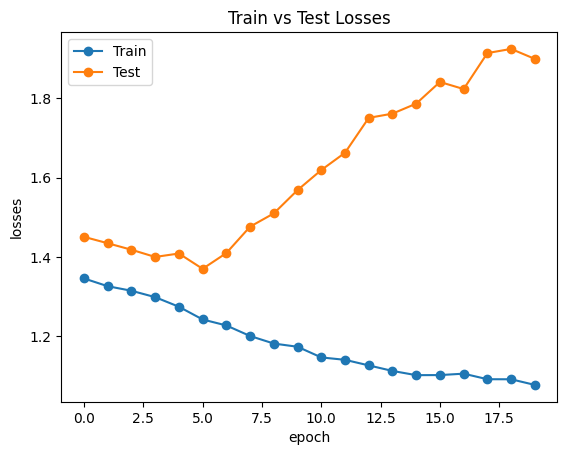

In [ ]:
plt.plot(train_losses,'-o')
plt.plot(eval_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train','Test'])
plt.title('Train vs Test Losses')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Retrieve each dictionary's values
try:
    train_values = train_loss.values
    test_values = test_loss.values
except AttributeError:
    raise ValueError('train_loss and test_loss must be dictionaries with a .values() method')


# Generate a sequence of integers to represent the epoch numbers
epochs = range(1, len(train_values) + 1)

# Verify that the length of train_values and test_values are the same
if len(train_values) != len(test_values):
    raise ValueError('train_loss and test_loss must have the same length')

# Plot and label the training and validation loss values
plt.plot(epochs, train_values, label='Training Loss')
plt.plot(epochs, test_values, label='Testing Loss')

# Add in a title and axes labels
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Set the tick locations
plt.xticks(np.arange(0, len(train_values) + 1, 10))

# Display the plot
plt.legend(loc='best')
plt.show()

TypeError: ignored

In [ ]:
# Retrieve each dictionary's values
train_values = train_accuracy.values()
test_values = test_accuracy.values()

# Generate a sequence of integers to represent the epoch numbers
epochs = range(1, 101)

# Plot and label the training and validation loss values
plt.plot(epochs, train_values, label='Training Accuracy')
plt.plot(epochs, test_values, label='Testing Accuracy')

# Add in a title and axes labels
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Set the tick locations
plt.xticks(np.arange(0, 101, 2))

# Display the plot
plt.legend(loc='best')
plt.show()

AttributeError: ignored